In [1]:
import sys
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import inference
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

l1 = 0.000 # regularization
nloop = 20

s0 = np.loadtxt('s0_simulated_original.txt')
w0 = np.loadtxt('w0.txt') 
# convert to onehot
onehot_encoder = OneHotEncoder(sparse=False)
s = onehot_encoder.fit_transform(s0)

In [3]:
n = s0.shape[1]
mx = np.array([len(np.unique(s0[:,i])) for i in range(n)])
mx_cumsum = np.insert(mx.cumsum(),0,0)
i1i2 = np.stack([mx_cumsum[:-1],mx_cumsum[1:]]).T 

In [4]:
# inferring h0 and w
mx_sum = mx.sum()
my_sum = mx.sum() #!!!! my_sum = mx_sum

w = np.zeros((mx_sum,my_sum))
h0 = np.zeros(my_sum)
cost = np.zeros((n,nloop))

niter = np.zeros(n)

for i0 in range(n):
    print('i0:',i0)       
    i1,i2 = i1i2[i0,0],i1i2[i0,1]
    x = np.hstack([s[:,:i1],s[:,i2:]])
    y = s[:,i1:i2]

    #w,h0,cost = inference.fit(x,y,nloop=10)
    w1,h01,cost1,niter1 = inference.fit_additive(x,y,l1,nloop)

    w[:i1,i1:i2] = w1[:i1,:]
    w[i2:,i1:i2] = w1[i1:,:]
        
    h0[i1:i2] = h01
    cost[i0,:] = cost1
    niter[i0] = niter1

('i0:', 0)
('i0:', 1)
('i0:', 2)
('i0:', 3)
('i0:', 4)
('i0:', 5)
('i0:', 6)
('i0:', 7)
('i0:', 8)
('i0:', 9)
('i0:', 10)
('i0:', 11)
('i0:', 12)
('i0:', 13)
('i0:', 14)
('i0:', 15)
('i0:', 16)
('i0:', 17)
('i0:', 18)
('i0:', 19)


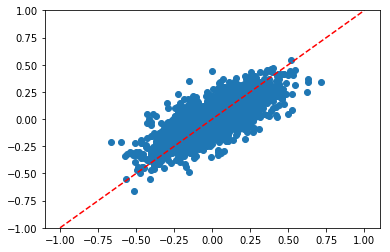

In [5]:
plt.plot([-1,1],[-1,1],'r--')
plt.ylim([-1.0,1.0])
plt.scatter(np.triu(w0),np.triu(w))
plt.show()

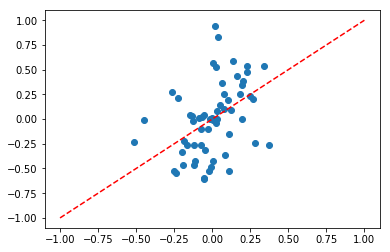

In [6]:
h0_true = np.loadtxt('h0.txt')
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(h0_true,h0)
plt.show()